# **Overview**

> **_In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest_.**


# TOOLBOX   :-)

In [1]:
# libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

sns.set(rc={'figure.figsize': (20, 10)})

In [ ]:

# ______________________________ HELPER FUNCTIONS________________________________________-

# ---------------- CHECKING AND DEALING WITH MISSING VALUES -----------------------

# ========================get % of null values
def percent_missing(data):
  # ---------------------
  df = data

  missing = df.isnull().sum().sort_values(ascending=False)

  percent = (df.isnull().sum() / len(df)).sort_values(ascending=False) 

  missing_value_df = pd.DataFrame({'column_name': missing,
                                'percent_missing': percent})
  
  return missing_value_df


# Function for systematic sampling
def sys_sample(df, r, n):

    k = df.shape[0] // n

    b = [None] * n

    #a = r

    b[0] = r

    for i in np.arange(1, n):
        r = r + k
        
        # checks and balances:
        if r > df.shape[0]:
            r =  r - df.shape[0]

        b[i] = r

    return df.iloc[b,:]


# function for simple sampling
def basic_sample(data, n=100):
  """
    # Selecting the sample
    set basic_sample(data, sample_size) 
  """
  data_sample = data.sample(n = 10, replace="False")
  return data_sample

# EXPLORITORY DATA ANALYSIS

### Report link: 

https://docs.google.com/document/d/1ErHzALnWmPkMRtEj_JLwcmTd67d4S81ZbygH4JEBjsw/edit?usp=sharing

##### ================ SUMMARY =========================

From our first analysis we see that we have 
two columns with the most number of missing values

> Scheduled at	with 99% missing values

> Displayed comment	with	97% missing values

### 1.0 LOAD DATA

In [ ]:
main_data = pd.read_csv("Autolib_dataset.csv")

## 2.0 VIEW OUR DATA

In [ ]:
#check head
main_data.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [ ]:
#check tail
main_data.tail()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27
4999,5 Rue Henry Brisson,4,4,0,0,0,operational,Paris,NaN,paris-henrybrisson-5,STATION,"48.8984293, 2.3347923",75018,Paris/Henry Brisson/5,operational,NaN,0,station,ok,nonexistent,2018,4,8,10,2


In [ ]:
# check data description
main_data.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [ ]:
#check data info
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [ ]:
# check data types
main_data.dtypes

Address                object
Cars                    int64
Bluecar counter         int64
Utilib counter          int64
Utilib 1.4 counter      int64
Charge Slots            int64
Charging Status        object
City                   object
Displayed comment      object
ID                     object
Kind                   object
Geo point              object
Postal code             int64
Public name            object
Rental status          object
Scheduled at           object
Slots                   int64
Station type           object
Status                 object
Subscription status    object
year                    int64
month                   int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [ ]:
# check shape of data
main_data.shape

(5000, 25)

In [ ]:
# check columns
main_data.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [ ]:
# check percent of missing data
percent_missing(main_data)

,column_name,percent_missing
Scheduled at,4953,0.9906
Displayed comment,4889,0.9778
minute,0,0.0000
Geo point,0,0.0000
Cars,0,0.0000
Bluecar counter,0,0.0000
Utilib counter,0,0.0000
Utilib 1.4 counter,0,0.0000
Charge Slots,0,0.0000
Charging Status,0,0.0000


## 3.0 CLEAN OUR DATA

In [ ]:
# remove columns 
#drop multiple columns by name
main_data.drop(['Scheduled at', 'Displayed comment'], axis=1, inplace=True)

In [ ]:
percent_missing(main_data)

,column_name,percent_missing
minute,0,0.0
Geo point,0,0.0
Cars,0,0.0
Bluecar counter,0,0.0
Utilib counter,0,0.0
Utilib 1.4 counter,0,0.0
Charge Slots,0,0.0
Charging Status,0,0.0
City,0,0.0
ID,0,0.0


In [ ]:
# check duplicates in our data
main_data.duplicated().any()

False

In [ ]:
# basic checks
main_data.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City', 'ID',
       'Kind', 'Geo point', 'Postal code', 'Public name', 'Rental status',
       'Slots', 'Station type', 'Status', 'Subscription status', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

In [ ]:
main_data.shape

(5000, 23)

In [ ]:
unik = []
for col in main_data:
  unik.append(main_data[col].unique())

unik[:5]

[array(['2 Avenue de Suffren', '145 Rue Raymond Losserand',
        '2 Avenue John Fitzgerald Kennedy', ..., '106 rue VercingÃ©torix',
        '134 boulevard National', '54 Boulevard SÃ©rurier'], dtype=object),
 array([0, 6, 3, 1, 5, 4, 2, 7]),
 array([0, 6, 3, 1, 5, 4, 2, 7]),
 array([0, 1, 2]),
 array([0, 2, 1, 3])]

## 4.0 DATA UNIFORMITY

In [ ]:
# lets remove spaces between column names for simplicity
# remove special character
main_data.columns = main_data.columns.str.replace(' ', '')

In [ ]:
main_data.columns

Index(['Address', 'Cars', 'Bluecarcounter', 'Utilibcounter',
       'Utilib1.4counter', 'ChargeSlots', 'ChargingStatus', 'City', 'ID',
       'Kind', 'Geopoint', 'Postalcode', 'Publicname', 'Rentalstatus', 'Slots',
       'Stationtype', 'Status', 'Subscriptionstatus', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [ ]:

#Create dates column by joining the year, month, day, hour and minute to enable us 
main_data['Dates'] = pd.to_datetime(main_data[['year', 'month', 'day', 'hour', 'minute']])

main_data = main_data.sort_values(by='Dates')

In [ ]:
main_data.head()

,Address,Cars,Bluecarcounter,Utilibcounter,Utilib1.4counter,ChargeSlots,ChargingStatus,City,ID,Kind,Geopoint,Postalcode,Publicname,Rentalstatus,Slots,Stationtype,Status,Subscriptionstatus,year,month,day,hour,minute,Dates
1046,112 Rue Monge BÃ¢timent Lieu-dit,0,0,0,0,0,nonexistent,Paris,paris-monge-112,STATION,"48.8392739, 2.3507414",75005,Paris/Monge/112,operational,4,station,ok,nonexistent,2018,4,1,0,0,2018-04-01 00:00:00
1107,19 place de la Madeleine,0,0,0,0,0,nonexistent,Paris,paris-madeleinetronchet-parking,PARKING,"48.87086, 2.32441",75008,Paris/Madeleine Tronchet/Parking,operational,6,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2874,44 rue SÃ©bastien Mercier,0,0,0,0,0,nonexistent,Paris,paris-sebastienmercier-44,STATION,"48.8439105, 2.2796928",75015,Paris/SÃ©bastien Mercier/44,operational,4,station,ok,nonexistent,2018,4,1,0,2,2018-04-01 00:02:00
2059,2 Avenue Mozart,1,1,0,0,0,nonexistent,Paris,paris-mozart-2,STATION,"48.85791, 2.273956",75016,Paris/Mozart/2,operational,3,station,ok,nonexistent,2018,4,1,0,3,2018-04-01 00:03:00
4453,2 rue Neuve Saint-Pierre,0,0,0,0,1,operational,Paris,paris-neuvesaintpierre-2,STATION,"48.853574, 2.363958",75004,Paris/Neuve Saint-Pierre/2,operational,4,station,ok,nonexistent,2018,4,1,0,4,2018-04-01 00:04:00


In [ ]:
main_data['Kind'].unique()

array(['STATION', 'PARKING', 'SPACE', 'CENTER'], dtype=object)

In [ ]:
main_data['Cars']

1046    0
1107    0
2874    0
2059    1
4453    0
       ..
2552    2
2672    2
4582    5
3201    0
4443    0
Name: Cars, Length: 5000, dtype: int64

In [ ]:
main_data.shape

(5000, 24)

In [ ]:
main_data.columns

Index(['Address', 'Cars', 'Bluecarcounter', 'Utilibcounter',
       'Utilib1.4counter', 'ChargeSlots', 'ChargingStatus', 'City', 'ID',
       'Kind', 'Geopoint', 'Postalcode', 'Publicname', 'Rentalstatus', 'Slots',
       'Stationtype', 'Status', 'Subscriptionstatus', 'year', 'month', 'day',
       'hour', 'minute', 'Dates'],
      dtype='object')

In [ ]:
# check unique values
main_data.Dates

1046   2018-04-01 00:00:00
1107   2018-04-01 00:02:00
2874   2018-04-01 00:02:00
2059   2018-04-01 00:03:00
4453   2018-04-01 00:04:00
               ...        
2552   2018-04-09 23:48:00
2672   2018-04-09 23:48:00
4582   2018-04-09 23:56:00
3201   2018-04-09 23:58:00
4443   2018-04-09 23:58:00
Name: Dates, Length: 5000, dtype: datetime64[ns]

In [ ]:
df = main_data[[
'Cars', 'Bluecarcounter', 'Utilibcounter',
'Utilib1.4counter', 'City','Postalcode','Dates'      
]].copy()

In [ ]:
df

,Cars,Bluecarcounter,Utilibcounter,Utilib1.4counter,City,Postalcode,Dates
1046,0,0,0,0,Paris,75005,2018-04-01 00:00:00
1107,0,0,0,0,Paris,75008,2018-04-01 00:02:00
2874,0,0,0,0,Paris,75015,2018-04-01 00:02:00
2059,1,1,0,0,Paris,75016,2018-04-01 00:03:00
4453,0,0,0,0,Paris,75004,2018-04-01 00:04:00
...,...,...,...,...,...,...,...
2552,2,2,0,0,CrÃ©teil,94000,2018-04-09 23:48:00
2672,2,2,0,1,Paris,75015,2018-04-09 23:48:00
4582,5,5,0,0,Paris,75019,2018-04-09 23:56:00
3201,0,0,0,0,Paris,75002,2018-04-09 23:58:00


In [ ]:
new_df = df[
              (df['Cars'] > 0) & (df['Bluecarcounter'] > 0) &
              (df['Utilib1.4counter'] > 0) & (df['Utilibcounter'])
]

In [ ]:
new_df.reset_index(drop=True)

,Cars,Bluecarcounter,Utilibcounter,Utilib1.4counter,City,Postalcode,Dates
0,1,1,1,3,SÃ¨vres,92310,2018-04-01 00:20:00
1,4,4,1,1,Maisons-Alfort,94700,2018-04-01 04:12:00
2,3,3,1,2,Paris,75017,2018-04-01 08:57:00
3,4,4,1,1,Boulogne-Billancourt,92100,2018-04-01 20:33:00
4,3,3,1,1,Paris,75017,2018-04-01 23:48:00
5,2,2,1,1,Paris,75017,2018-04-02 00:40:00
6,1,1,1,1,Charenton-le-Pont,94220,2018-04-02 03:55:00
7,3,3,1,2,SÃ¨vres,92310,2018-04-02 05:30:00
8,4,4,1,1,Paris,75018,2018-04-02 07:44:00
9,2,2,1,1,Paris,75017,2018-04-02 09:41:00


In [ ]:
print(new_df.count())

percent_missing(new_df)

Cars                54
Bluecarcounter      54
Utilibcounter       54
Utilib1.4counter    54
City                54
Postalcode          54
Dates               54
dtype: int64


,column_name,percent_missing
Dates,0,0.0
Postalcode,0,0.0
City,0,0.0
Utilib1.4counter,0,0.0
Utilibcounter,0,0.0
Bluecarcounter,0,0.0
Cars,0,0.0


In [ ]:
new_df.dtypes

Cars                         int64
Bluecarcounter               int64
Utilibcounter                int64
Utilib1.4counter             int64
City                        object
Postalcode                   int64
Dates               datetime64[ns]
dtype: object

#### ---- OBSERVATIONS ---------

1. We have cleaned and checked our data, reformated by stripping our column names.

2. We named a new date column and grouped it.

3. Then we finally just dropped unneccessary columns and created a new dataframe

4. Data is only 2018

# UNIVARIATE ANALYSIS

##### ================ SUMMARY =========================

> Paris is the most frequented city followed by Gennevilliers and Rueil-Malmaison

> Our data is normaly distributed

In [ ]:
new_df['City'].unique()

array(['SÃ¨vres', 'Maisons-Alfort', 'Paris', 'Boulogne-Billancourt',
       'Charenton-le-Pont', 'Gennevilliers', 'Rosny-sous-Bois',
       'Rueil-Malmaison', 'AsniÃ¨res-sur-Seine', "Ville-d'Avray",
       'Issy-les-Moulineaux', 'Bois-Colombes', 'Champigny-sur-Marne',
       'Suresnes', 'Nogent-sur-Marne', 'Bagneux', 'CrÃ©teil', 'Montreuil',
       'VerriÃ¨res-le-Buisson', 'Antony', 'Cachan', 'Villejuif'],
      dtype=object)

### Categorical Data

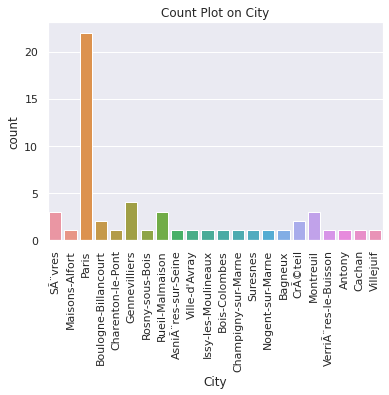

<Figure size 432x288 with 0 Axes>

In [ ]:
# frequency table
sns.countplot(x='City',data=new_df)
plt.title("Count Plot on City")
plt.xticks(rotation=90)
plt.show()
plt.savefig('CountPlotonCity.png')

#### Numerical Data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


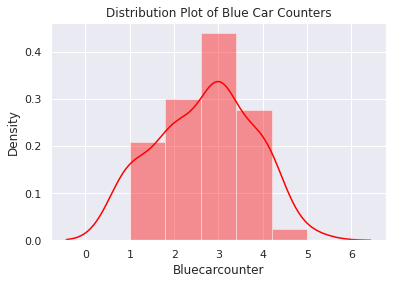

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.distplot(new_df['Bluecarcounter'], color ='red',bins=5)
# sns.distplot(new_df['Utilibcounter'], color ='red',bins=5)
# sns.distplot(new_df['Utilib1.4counter'], color ='red',bins=5)

plt.title("Distribution Plot of Blue Car Counters")
plt.show()
plt.savefig('Distribution Plot of Blue Car Counters.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


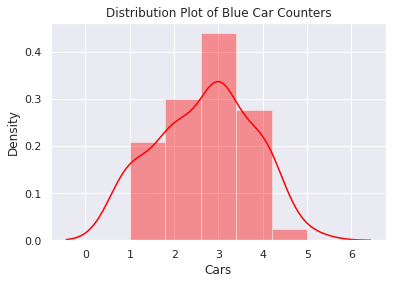

In [ ]:
sns.distplot(new_df['Cars'], color ='red',bins=5)

plt.title("Distribution Plot of Blue Car Counters")
plt.show()

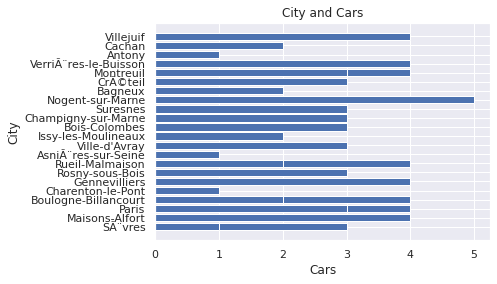

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.barh(new_df['City'], new_df['Cars'])
plt.ylabel("City")
plt.xlabel("Cars")
plt.title("City and Cars")
plt.show()
plt.savefig('cityandcars.png')

### Pie chart

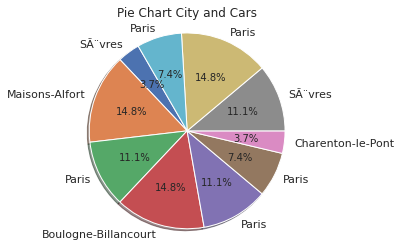

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting our pie chart
plt.pie(new_df['Cars'][:10],labels=new_df['City'][:10], autopct='%1.1f%%', shadow=True, startangle=120)

plt.axis('equal')
plt.title('Pie Chart City and Cars')
plt.show()
plt.savefig('PieChartcityandcars.png')

# BIVARIATE ANALYSIS

##### ================ SUMMARY =========================

> We have few outliers in our data

> From our scatter plot our data seems to show positive correlation


In [ ]:
new_df.columns

Index(['Cars', 'Bluecarcounter', 'Utilibcounter', 'Utilib1.4counter', 'City',
       'Postalcode', 'Dates'],
      dtype='object')

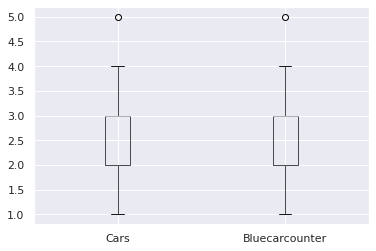

In [ ]:
# Box plot
boxplot = new_df.boxplot(column=['Cars','Bluecarcounter'])
plt.show()


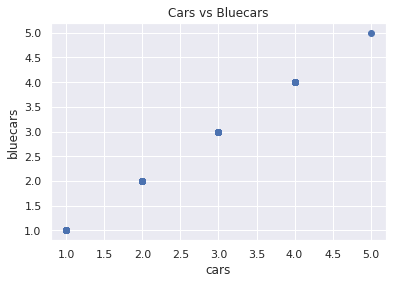

In [ ]:
# Plotting our scatterplot
plt.scatter(new_df['Cars'],new_df['Bluecarcounter'])
# Giving our scatterplot a title
plt.title('Cars vs Bluecars')

# Labelling our x axis
plt.xlabel('cars')

# Labelling our y axis
plt.ylabel('bluecars')

# Displaying our scatterplot
plt.show()

In [ ]:
# Removing outliers
from scipy import  stats

In [ ]:
Q1 = np.quantile(new_df['Cars'], 0.25)
Q3 = np.quantile(new_df['Bluecarcounter'],0.75)

IQR = Q3 - Q1

print("================== IQR ===================")

print(IQR)

================== IQR ===================
1.0


In [ ]:
# Get Zscore
z_scores = pd.DataFrame(
    {
        'cars': new_df['Cars'],
        'z_score_car': stats.zscore(new_df['Cars']),
        'Blue counter': new_df['Bluecarcounter'],
        'z_score_blue_car_counter': stats.zscore(new_df['Bluecarcounter'])
    }
)

z_scores.reset_index(drop=True)

,cars,z_score_car,Blue counter,z_score_blue_car_counter
0,1,-1.603415,1,-1.603415
1,4,1.251016,4,1.251016
2,3,0.299539,3,0.299539
3,4,1.251016,4,1.251016
4,3,0.299539,3,0.299539
5,2,-0.651938,2,-0.651938
6,1,-1.603415,1,-1.603415
7,3,0.299539,3,0.299539
8,4,1.251016,4,1.251016
9,2,-0.651938,2,-0.651938


# HYPOTHESIS TESTING

##### ================ Hypothesis =======================

> 1. Ho: u = The number of Bluecars taken in area postal codes is different 
2. H1: u != The number of Bluecars taken in area postal codes  is not different

##### ================ SUMMARY =========================

>  We have failed to reject our Null hypothesis :-(

In [ ]:
new_df.head()

,Cars,Bluecarcounter,Utilibcounter,Utilib1.4counter,City,Postalcode,Dates,Day_name
0,1,1,1,3,SÃ¨vres,92310,2018-04-01 00:20:00,Sunday
1,4,4,1,1,Maisons-Alfort,94700,2018-04-01 04:12:00,Sunday
2,3,3,1,2,Paris,75017,2018-04-01 08:57:00,Sunday
3,4,4,1,1,Boulogne-Billancourt,92100,2018-04-01 20:33:00,Sunday
4,3,3,1,1,Paris,75017,2018-04-01 23:48:00,Sunday


In [ ]:
new_df['City'].value_counts()

Paris                    22
Gennevilliers             4
Rueil-Malmaison           3
SÃ¨vres                   3
Montreuil                 3
Boulogne-Billancourt      2
CrÃ©teil                  2
Cachan                    1
Bois-Colombes             1
Issy-les-Moulineaux       1
Bagneux                   1
Maisons-Alfort            1
Rosny-sous-Bois           1
Suresnes                  1
Ville-d'Avray             1
Charenton-le-Pont         1
VerriÃ¨res-le-Buisson     1
AsniÃ¨res-sur-Seine       1
Nogent-sur-Marne          1
Champigny-sur-Marne       1
Villejuif                 1
Antony                    1
Name: City, dtype: int64

## 1.0 SAMPLING

In [ ]:
new_df = new_df.reset_index(drop=True)
new_df.shape

(54, 7)

In [ ]:
new_df['Dates'].head()

0   2018-04-01 00:20:00
1   2018-04-01 04:12:00
2   2018-04-01 08:57:00
3   2018-04-01 20:33:00
4   2018-04-01 23:48:00
Name: Dates, dtype: datetime64[ns]

In [ ]:
# create a column for date name
# Get name of each date
new_df['Day_name'] = new_df['Dates'].dt.day_name()

In [ ]:
new_df.shape

(54, 8)

In [ ]:
# ============================================= let us take a sample
new_sample = new_df.sample(n = 40, replace="False")
new_sample

,Cars,Bluecarcounter,Utilibcounter,Utilib1.4counter,City,Postalcode,Dates,Day_name
26,3,3,1,1,Ville-d'Avray,92410,2018-04-04 14:44:00,Wednesday
26,3,3,1,1,Ville-d'Avray,92410,2018-04-04 14:44:00,Wednesday
51,3,3,1,1,Paris,75017,2018-04-08 17:10:00,Sunday
38,4,4,1,1,Montreuil,93100,2018-04-06 01:33:00,Friday
4,3,3,1,1,Paris,75017,2018-04-01 23:48:00,Sunday
34,1,1,1,1,Paris,75019,2018-04-05 11:19:00,Thursday
38,4,4,1,1,Montreuil,93100,2018-04-06 01:33:00,Friday
51,3,3,1,1,Paris,75017,2018-04-08 17:10:00,Sunday
19,4,4,1,1,Rueil-Malmaison,92500,2018-04-03 01:55:00,Tuesday
18,3,3,1,1,Paris,75014,2018-04-03 01:36:00,Tuesday


In [ ]:
new_sample['Day_name'].unique()

array(['Friday', 'Thursday', 'Monday', 'Tuesday', 'Saturday', 'Sunday'],
      dtype=object)

In [ ]:
# From our data we get days that are weekdays and Postalcode ()
days = ['Tuesday', 'Monday', 'Thursday', 'Wednesday', 'Friday']

new_sample = new_sample.loc[ new_sample['Day_name'].isin(days)]

In [ ]:
# we had selected a sample size of 40 but our const
# rains of either weekennd or weekdays 

new_sample.shape

(27, 8)

In [ ]:
new_sample['Postalcode'].unique()

array([93100, 92150, 92230, 75016, 92500, 75017, 94130, 92270, 92220,
       93110, 75014, 75018, 75013, 94000, 92160, 75020, 92100])

In [ ]:
# As we have picked less than 30 samples lets perform a T-test

blue_cars_mean = np.mean(new_sample['Bluecarcounter'])
cars_mean = np.mean(new_sample['Cars'])


print("blue_cars_mean == ",blue_cars_mean)
print("cars_mean == ",cars_mean)

blue_cars_mean ==  3.111111111111111
cars_mean ==  3.111111111111111


In [ ]:
# =================== A two sample Ttest
ttest, pvalue = stats.ttest_ind(new_sample['Bluecarcounter'],new_sample['Cars'])

print("ttest =======> ", ttest, "\n Pvalue=============> ",pvalue)

if pvalue < 0.05:
  print("\n We reject the Null Hypothesis (HO) \n")
else:
  print("\n We have failed to reject the Null Hypothesis")

ttest =======>  0.0 
 Pvalue=============>  1.0

 We have failed to reject the Null Hypothesis
